## Exercises 04

### Introduction

The aim of these exercises is to perform numerical simulation of a microcanonical ensemble in 3 different phases (solid, liquid, gas). This is done through a Molecular Dynamics code, which simulates the time dependent evolution of a many-particles system: at each simulation step, the program "knows" all the particle positions and speeds and works out the next configuration based on an interaction potential (the potential expression is given as an input). The whole simulation can be divided in two main phases:
- at first, is is necessary to equilibrate the system, i.e. starting from a given configuration ($fcc \ lattice$ in this particular case), the code is run through a certain number of steps until the system observables (temperature/internal energy ...) reach approximately stable values,
- then it is possible to perform the observales measurements.

#### Verlet algorithm
More specifically, in these exercises the Verlet algorithm was used as MD algorithm and the Lennard-Jones potential as internal potential. The Verlet algorithm numerically integrates the equations of motion. The main characteristics of this algorithm are:

1) It is not self-starting: if a single configuration is provided, the code estimates random velocities with center of mass velocity equal to zero and estimate the "old" configuration

2) Does not use velocities to work out the next configuration (velocities are only used to measure kinetic energy and thus temperature)

3) it is good at conserving energy $\rightarrow$ useful for NVE/microcanonical system simulations

4) it is time-reversible

5) at each steps, the algorithm evalutes the following configuration through:
$$ \vec{r}(t + \delta t) \approx 2\vec{r}(t) - \vec{r}(t - \delta t) + \delta t^2 \vec{a}, $$ where the acceleration $ \vec{a} = \frac{\vec{F}}{m} = \frac{\vec{\nabla}V}{m}$

In this case V is the Lennard-Jones potential. This is a pair potential and between each couple of particles $i$ and $j$: $$V_{ij}=4 \epsilon \left[\left(\frac{\sigma}{|r_i-r_j|}\right)^{12}-\left(\frac{\sigma}{|r_i-r_j|}\right)^{6}\right]$$

#### Periodic Boundary Conditions
The system is simulated to be in a cubic box and 3D Periodic Boundary Conditions (PBC) are applied to the problem. Whenever a particle leaves the box it "re-enters" from the opposite face of the cube. In this way it is possible to simulate an infinite space, too.

#### Potential cutoff
In orded to simulate short range forces, a spherical cutoff is applied. when calculating the force acting on a specific particle, only particles within a sphere of radius $r_{c}$ from that particle are considered. $r_{c}$ is minimum for the solid phase and maximum for the gas phase. 

#### Lennard Jones (LJ) units
These are reduced units for the Lennard-Jones potential. The conversion is done by introducing a unit of energy $\epsilon$, a unit of length $\sigma$ and a unit of mass $m$ (these three could be different according to the considered element in the simulation). It is useful to rescale all quantities from SI units to LJ units while running the simulation, since many conbinations of pressure, temperature, $\epsilon$ and $\sigma$ (different elements $\rightarrow$ different $\epsilon$ and $\sigma$ + different SI units) may be the same in LJ units. Moreover, most of the observables are of order 1 if expressed in LJ units, making it easier to spot errors in the code while avoiding overflow/underflow.
Quantities in LJ units are expressed with * :
$$ V^* = \frac{V}{\epsilon} \qquad P^* = P \frac{\sigma^3}{\epsilon} \qquad T^* = T \frac{k_B}{\epsilon} \qquad \rho^* = \rho \sigma^3$$

### 4.1 Equilibration

$\rightarrow$ NVE_nuovo.cpp

In this first part of the exercise the given NVE code was modified to equilibrate speeds and restart from a previous configuration. More specifically, the following functions were added to the given code:
- <font face="Courier"> Instant() </font></span> $\rightarrow$ to print out the instant values at each measurement in order to visualize the instant trend of the considered observables

- <font face="Courier"> Rescale() </font></span> $\rightarrow$ to rescale velocities to equilibrate the system if the $Equilibration$ option is on. This function rescales all the particle speeds to match the desired temperature in the input file.

- <font face="Courier"> ConfOld() </font></span> $\rightarrow$ to write the final configuration in the <font face="Courier"> old.final </font></span> file and second to last configuration in the <font face="Courier"> old.0</font></span> file.

- <font face="Courier"> Read_old() </font></span> $\rightarrow$ to restart the code if the $old$ option is on, reading both the "old" configuration (which should have been previously saved in <font face="Courier">old.0</font></span>) and the "first" configuration (previously saved in <font face="Courier">old.final</font></span>) 

In order to equilibrate:
- run the code from the <font face="Courier">config.0</font></span> configuration (fcc configuration) with 1000 steps and both the $old$ and the $equilibration$ options off, thus getting the <font face="Courier">old.0</font></span> and <font face="Courier">old.final</font></span> configurations for the first time,
- run the code at least 3/4 times with 1000 steps and both the $old$ and the $equilibration$ options on (it was actually run 7 times)


The following graph reports the temperature instant values during equilibration: as can be noticed, the temperature progressively gets to the target value of 0.8 in LJ units. The first 100 measurements refers to the first run of the code with $old=0$ and $equilibration=0$. The solid phase values were considered ($\rho^\star = 1.1$, $T^\star = 0.8$, cut-off radius $r_c = 2.2$) . 

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

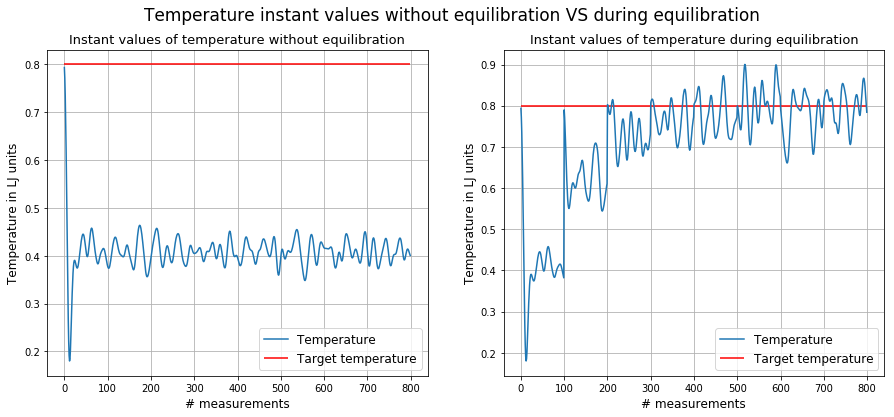

In [24]:
## without equilibration VS during equilibration

N=800
temp_no = np.loadtxt( './Solid/instant_forseok2_NOequi.dat',max_rows=N, usecols=3, skiprows=90)
temp_si = np.loadtxt( './Solid/instant_forseok_equilibration.dat',max_rows=N, usecols=3)
x = np.arange(N)

plt.figure(figsize=(15,6))
plt.suptitle("Temperature instant values without equilibration VS during equilibration", size=17)

plt.subplot(1,2,1)
plt.plot(x,temp_no, label="Temperature")
plt.hlines(0.8, xmin=min(x), xmax=max(x),label="Target temperature",color="red")
plt.xlabel('# measurements',size=12)
plt.ylabel('Temperature in LJ units',size=12)
plt.title("Instant values of temperature without equilibration", size=13)
plt.legend(loc="lower right" , fontsize=12)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x,temp_si, label="Temperature")
plt.hlines(0.8, xmin=min(x), xmax=max(x),label="Target temperature",color="red")
plt.xlabel('# measurements',size=12)
plt.ylabel('Temperature in LJ units',size=12)
plt.title("Instant values of temperature during equilibration", size=13)
plt.legend(loc="lower right" , fontsize=12)
plt.grid(True)

The following graphs show the other quantities during the equilibration.

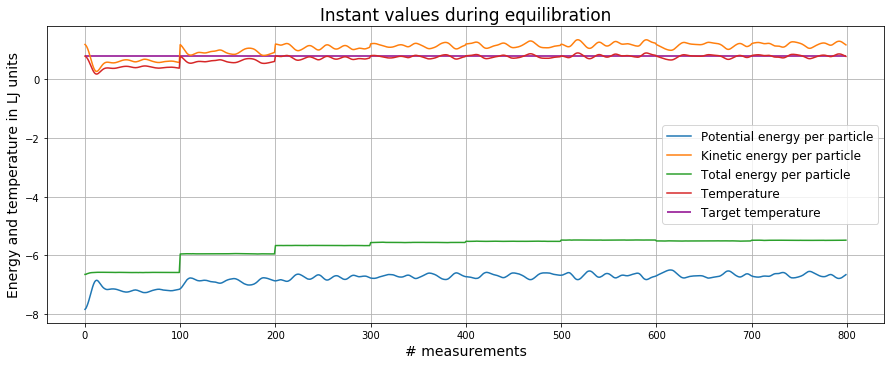

In [41]:
## Other quantities during equilibration

N=800
epot = np.loadtxt( './Solid/instant_forseok_equilibration.dat',max_rows=N, usecols=0)
ekin = np.loadtxt( './Solid/instant_forseok_equilibration.dat',max_rows=N, usecols=1)
etot = np.loadtxt( './Solid/instant_forseok_equilibration.dat',max_rows=N, usecols=2)
temp = np.loadtxt( './SOlid/instant_forseok_equilibration.dat',max_rows=N, usecols=3)
x = np.arange(N)
##x*=10 ## numero effettivo di steps, dato che misuro ogni 10

plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(x,epot, label="Potential energy per particle")
plt.plot(x,ekin, label="Kinetic energy per particle")
plt.plot(x,etot, label="Total energy per particle")
plt.plot(x,temp, label="Temperature")
plt.hlines(0.8, xmin=min(x), xmax=max(x),label="Target temperature",color="darkmagenta")
plt.xlabel('# measurements',size=14)
plt.ylabel('Energy and temperature in LJ units',size=14)
plt.title("Instant values during equilibration", size=17)
plt.legend(loc="center right" , fontsize=12)
plt.grid(True)

Total energy increaeses at each simulation run, since temperature and thus kinetic energy as well are increasing. However, within each simulation run the total energy approximately sticks to a constant value.

Once the system is equilibrated, the code was run with 10000 steps to check that temperature kept fluctuating around the target value 0.8 (LJ units). The following graphs report the temperature as well as other quantities trends (instant values) after equilibration.

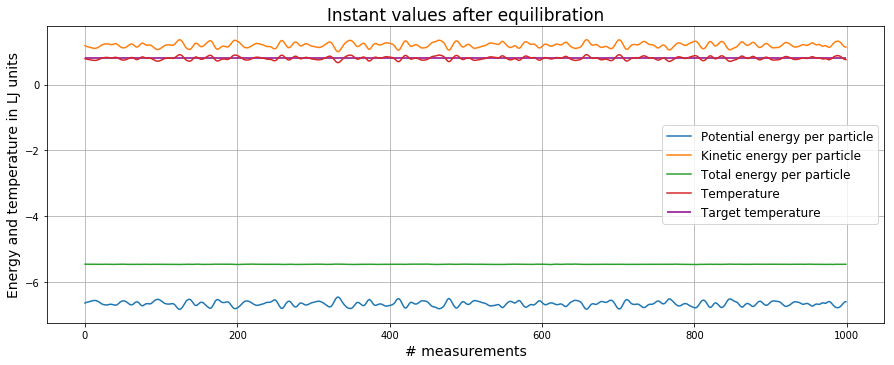

In [42]:
## Other quantities after equilibration

N=1000
epot = np.loadtxt( './Solid/instant_forseok_afterequi.dat',max_rows=N, usecols=0)
ekin = np.loadtxt( './Solid/instant_forseok_afterequi.dat',max_rows=N, usecols=1)
etot = np.loadtxt( './Solid/instant_forseok_afterequi.dat',max_rows=N, usecols=2)
temp = np.loadtxt( './Solid/instant_forseok_afterequi.dat',max_rows=N, usecols=3)
x = np.arange(N)
##x*=10 ## numero effettivo di steps, dato che misuro ogni 10

plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(x,epot, label="Potential energy per particle")
plt.plot(x,ekin, label="Kinetic energy per particle")
plt.plot(x,etot, label="Total energy per particle")
plt.plot(x,temp, label="Temperature")
plt.hlines(0.8, xmin=min(x), xmax=max(x),label="Target temperature",color="darkmagenta")
plt.xlabel('# measurements',size=14)
plt.ylabel('Energy and temperature in LJ units',size=14)
plt.title("Instant values after equilibration", size=17)
plt.legend(loc="center right" , fontsize=12)
plt.grid(True)

### 4.2 Average values with uncertanties

The code was further modified using the data blocking method to evaluate the average values for $\frac{U}{N}$, $\frac{E_{tot}}{N}$, $\frac{K}{N}$, $T$, as shown in the following graphs.

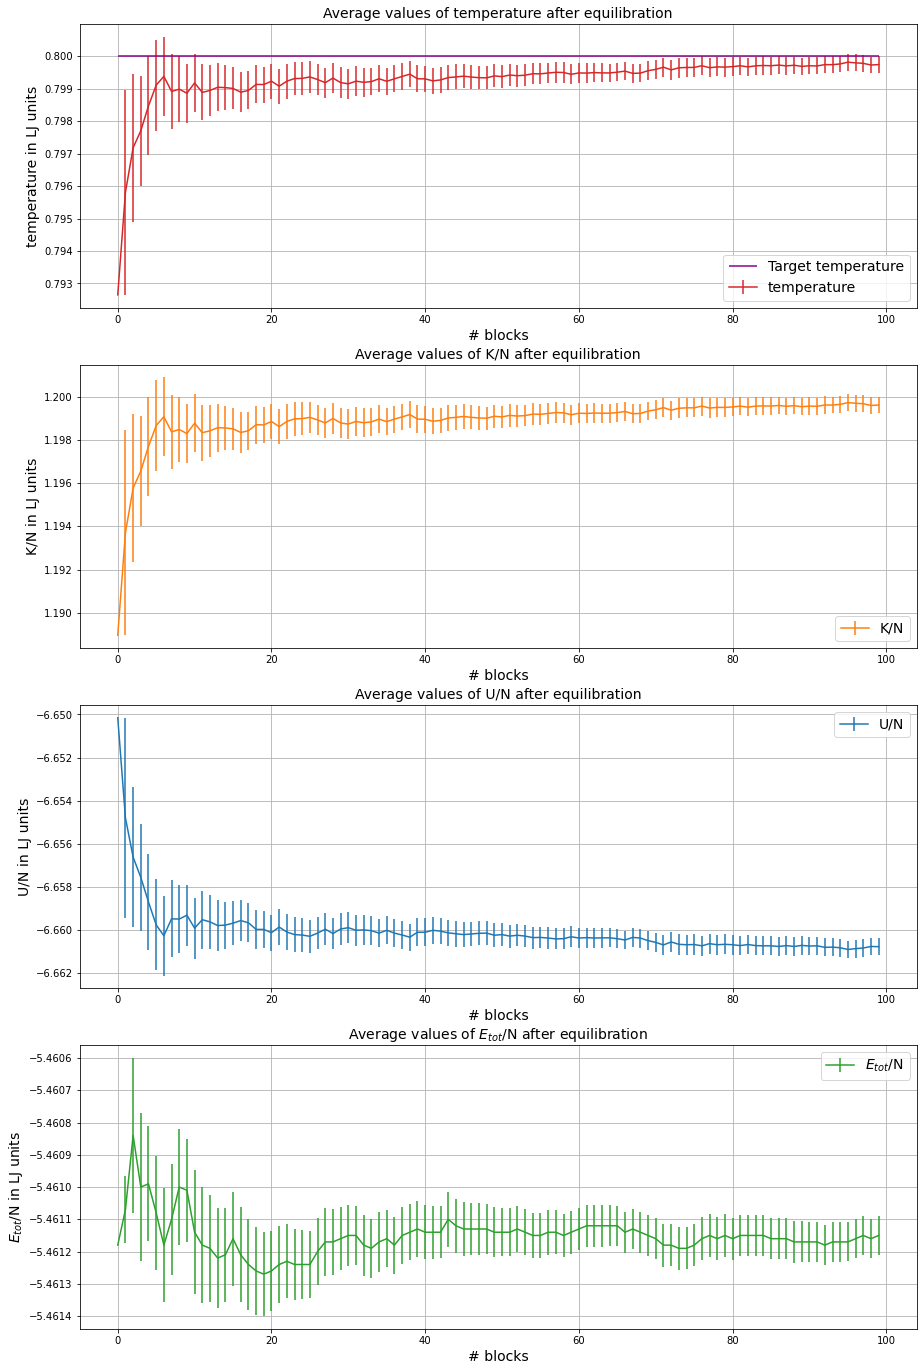

In [4]:
## average values after equi 
## 100 blocks, 2000 steps in each  block -> 200 measures per block
N=100
x = np.arange(N)
#x *= 200

##Reading 
temp_ave = np.loadtxt( './Solid/temp_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
err_temp = np.loadtxt( './Solid/temp_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
epot_ave = np.loadtxt( './Solid/epot_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
err_epot = np.loadtxt( './Solid/epot_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
etot_ave = np.loadtxt( './Solid/etot_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
err_etot = np.loadtxt( './Solid/etot_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
ekin_ave = np.loadtxt( './Solid/ekin_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
err_ekin = np.loadtxt( './Solid/ekin_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
ave = [temp_ave , ekin_ave, epot_ave, etot_ave]
err_ave = [err_temp, err_ekin, err_epot, err_etot]
colors = ["C3", "C1", "C0", "C2"]
names = ["temperature", "K/N", "U/N", "$E_{tot}$/N"]

#plot
plt.figure(figsize=(15,24))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.errorbar(x, ave[i], err_ave[i], label=names[i] , color=colors[i])
    if (i==0):
        plt.hlines(0.8, xmin=min(x), xmax=max(x),label="Target temperature",color="darkmagenta")
    plt.xlabel('# blocks',size=14)
    plt.ylabel( names[i] + ' in LJ units',size=14)
    plt.title("Average values of " + names[i] + " after equilibration", size=14)
    if(i==2 or i==3):
        plt.legend(loc="upper right" , fontsize=14)
    else:
        plt.legend(loc="lower right", fontsize=14 )
    plt.grid(True)


It is possible to notice that while temperature and kinetic energy increase, potential energy  descreases, so that the total energy is approximately constant.

- Equilibration solid: 1000 with both restart and rescale off + $1000$ steps $\times 7$ times with both restart and rescale on (+ 100 blocks of 2000 steps each to measure)
- Equilibration liquid: 1000 with both restart and rescale off + $1000$ steps $\times 5$ times with both restart and rescale on + 10000 steps with both restart and rescale on (+ 100 blocks of 2000 steps each to measure)
- Equilibation gas: 500 with both restart and rescale off + $500$ steps $\times 5$ times with both restart and rescale on + 10000 steps with both restart and rescale on (+ 100 blocks of 2000 steps each to measure)

### 4.3 Argon in SI units

In this exercise simulation of Argon in 3 different phases were performed with the updated code. Here are reported the particle density, temperature and cut-off radius values for the different phases in LJ units:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$),
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$),
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$).

The results were then rescaled in SI units using the following parameters:

In [6]:
## SI units
nm = 10**(-9) #[m]
k_B = 1.380649E-23 
amu = 1.66054E-27 #[kg]

##Argon values
sigma = 0.34*nm
epsilon = 120*k_B 
m=39.948*amu

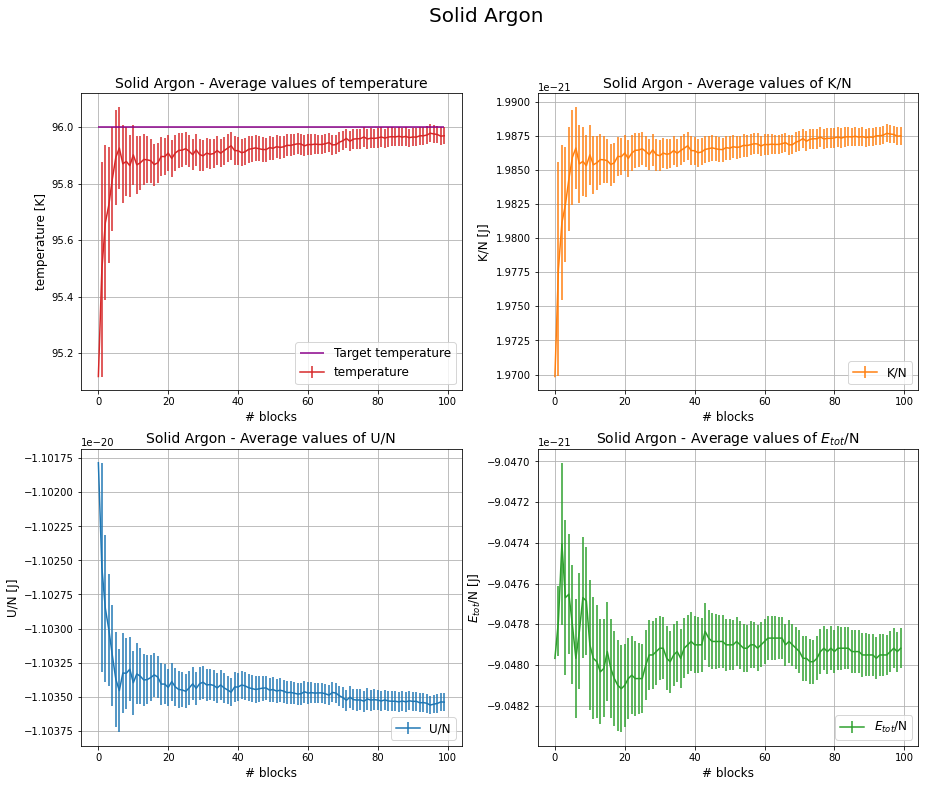

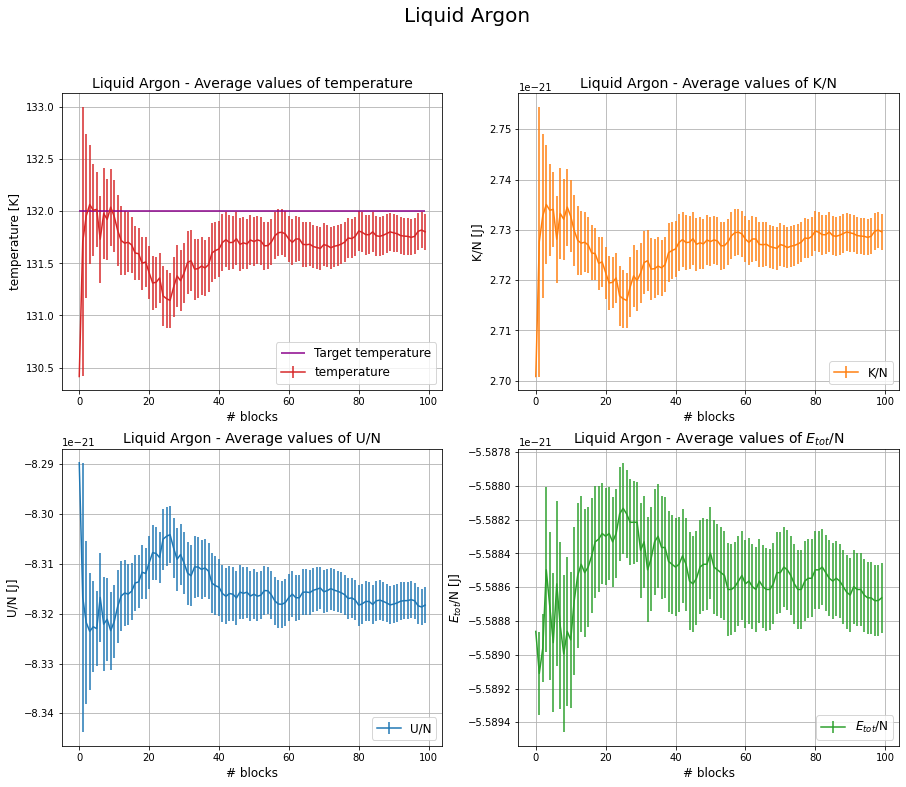

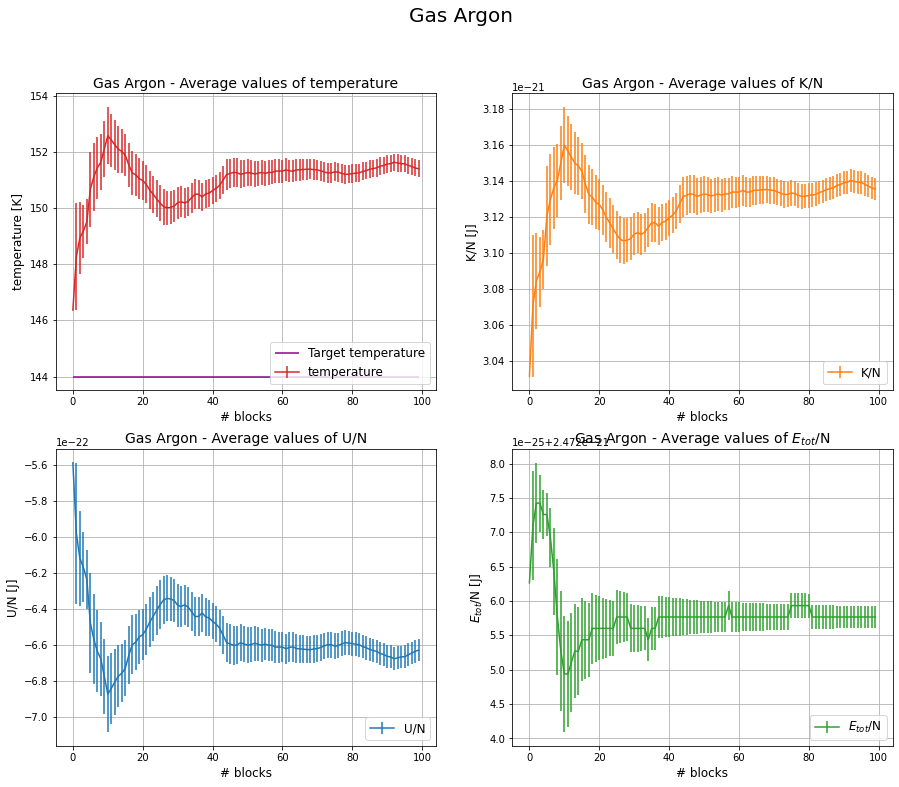

In [10]:
N=100
x = np.arange(N)
#x *= 200 ## 2000 step, quindi 200 misure in ogni blocco

names = ["Solid", "Liquid" , "Gas"]
obs = ["temperature", "K/N", "U/N", "$E_{tot}$/N"]
colors = ["C3", "C1", "C0", "C2"]
lines = [0.8 , 1.1, 1.2]

for p in range(3):
    ##Reading
    if(p==2):
        temp_ave = np.loadtxt( './'+names[p]+'/temp_blocks_forseok3_afterequi.dat',max_rows=N, usecols=2)
        err_temp = np.loadtxt( './'+names[p]+'/temp_blocks_forseok3_afterequi.dat',max_rows=N, usecols=3)
        epot_ave = np.loadtxt( './'+names[p]+'/epot_blocks_forseok3_afterequi.dat',max_rows=N, usecols=2)
        err_epot = np.loadtxt( './'+names[p]+'/epot_blocks_forseok3_afterequi.dat',max_rows=N, usecols=3)
        etot_ave = np.loadtxt( './'+names[p]+'/etot_blocks_forseok3_afterequi.dat',max_rows=N, usecols=2)
        err_etot = np.loadtxt( './'+names[p]+'/etot_blocks_forseok3_afterequi.dat',max_rows=N, usecols=3)
        ekin_ave = np.loadtxt( './'+names[p]+'/ekin_blocks_forseok3_afterequi.dat',max_rows=N, usecols=2)
        err_ekin = np.loadtxt( './'+names[p]+'/ekin_blocks_forseok3_afterequi.dat',max_rows=N, usecols=3)
    else:
        temp_ave = np.loadtxt( './'+names[p]+'/temp_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
        err_temp = np.loadtxt( './'+names[p]+'/temp_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
        epot_ave = np.loadtxt( './'+names[p]+'/epot_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
        err_epot = np.loadtxt( './'+names[p]+'/epot_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
        etot_ave = np.loadtxt( './'+names[p]+'/etot_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
        err_etot = np.loadtxt( './'+names[p]+'/etot_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
        ekin_ave = np.loadtxt( './'+names[p]+'/ekin_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
        err_ekin = np.loadtxt( './'+names[p]+'/ekin_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
    averages = [temp_ave, ekin_ave , epot_ave, etot_ave]
    err = [err_temp, err_ekin, err_epot, err_etot ]

##Rescaling
    for i in range(4):
        if(i==0): ##temperature
            averages[i] *= epsilon/k_B
            err[i] *= epsilon/k_B
        else:  ##energy
            averages[i] *= epsilon
            err[i] *= epsilon

    ##Plot
    plt.figure(figsize=(15,12))
    plt.suptitle( names[p] + " Argon", size=20)

    for i in range(4):
        plt.subplot(2,2, i+1)
        plt.errorbar(x,averages[i], err[i], label=obs[i], color=colors[i])
        if(i==0):
            plt.hlines(lines[p]*epsilon/k_B, xmin=min(x), xmax=max(x),label="Target temperature",color="darkmagenta")
            plt.ylabel( obs[i] + " [K]", size=12)
        else:
            plt.ylabel(obs[i] + " [J]", size=12)
        plt.xlabel('# blocks',size=12)   
        plt.title(names[p] + " Argon - Average values of " + obs[i], size=14)
        plt.legend(loc="lower right" , fontsize=12)
        plt.grid(True)

While solid and liquid phases are similar and approximately stick to the temperature reached though equilibration, the gas phase shows a highly irregular behaviuor.

### 4.4 Pressure

Finally, the code was upgraded to evaluate pressure as well. Pressure was calculate through:

$$  P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

which, using LJ units, becomes:

$$  P^* = \rho^* T^* + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\left[ \left(\frac{1}{|\vec{r}_i^* -\vec{r}_j^*|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r}_i^* -\vec{r}_j^*|}\right)^6 \right] \right\rangle  $$

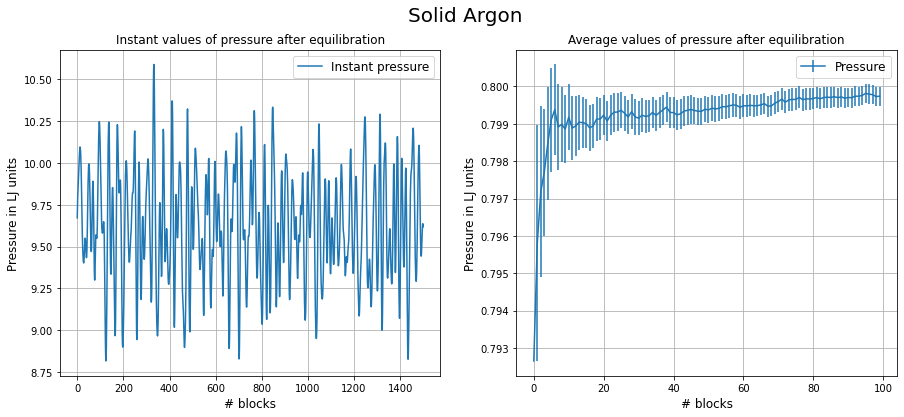

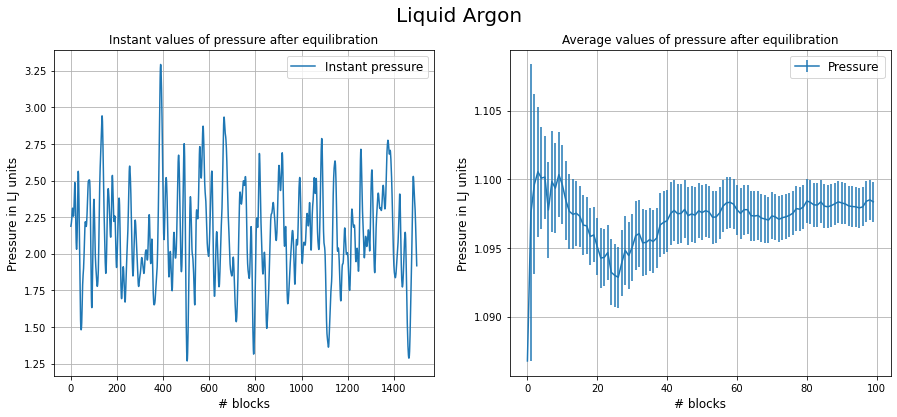

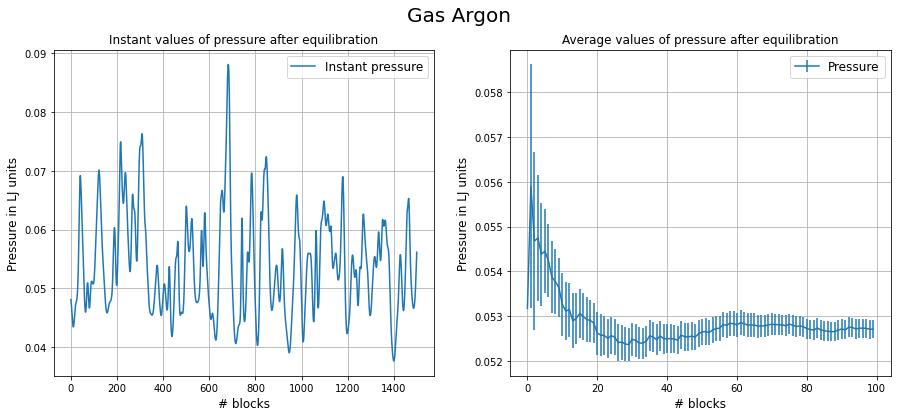

In [14]:
#averages
N=100
x = np.arange(N)
#x *= 200 ## 2000 step, quindi 200 misure in ogni blocco
#instant (showing just the first 1500 values)
N1=1500
x1 = np.arange(N1)

names = ["Solid", "Liquid" , "Gas"]

for phase in names:
    #Reading
    if(phase == "Gas"):
        press_ave = np.loadtxt( './'+phase+'/press_blocks_forseok3_afterequi.dat',max_rows=N, usecols=2)
        err_press = np.loadtxt( './'+phase+'/press_blocks_forseok3_afterequi.dat',max_rows=N, usecols=3)
        press_inst = np.loadtxt('./'+phase+'/instant_forseok3_afterequi.dat',max_rows=N1, usecols=4)
    else:
        press_ave = np.loadtxt( './'+phase+'/temp_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
        err_press = np.loadtxt( './'+phase+'/temp_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
        press_inst = np.loadtxt('./'+phase+'/instant_forseok2_afterequi.dat',max_rows=N1, usecols=4)


    ##Plot
    plt.figure(figsize=(15,6))
    plt.suptitle( phase + " Argon", size=20)

    plt.subplot(1,2,1)
    plt.plot(x1,press_inst, label="Instant pressure")
    plt.xlabel('# blocks',size=12)
    plt.ylabel('Pressure in LJ units',size=12)
    plt.title("Instant values of pressure after equilibration", size=12)
    plt.legend(loc="upper right" , fontsize=12)
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.errorbar(x,press_ave, err_press, label="Pressure")
    plt.xlabel('# blocks',size=12)
    plt.ylabel('Pressure in LJ units',size=12)
    plt.title("Average values of pressure after equilibration", size=12)
    plt.legend(loc="upper right" , fontsize=12)
    plt.grid(True)

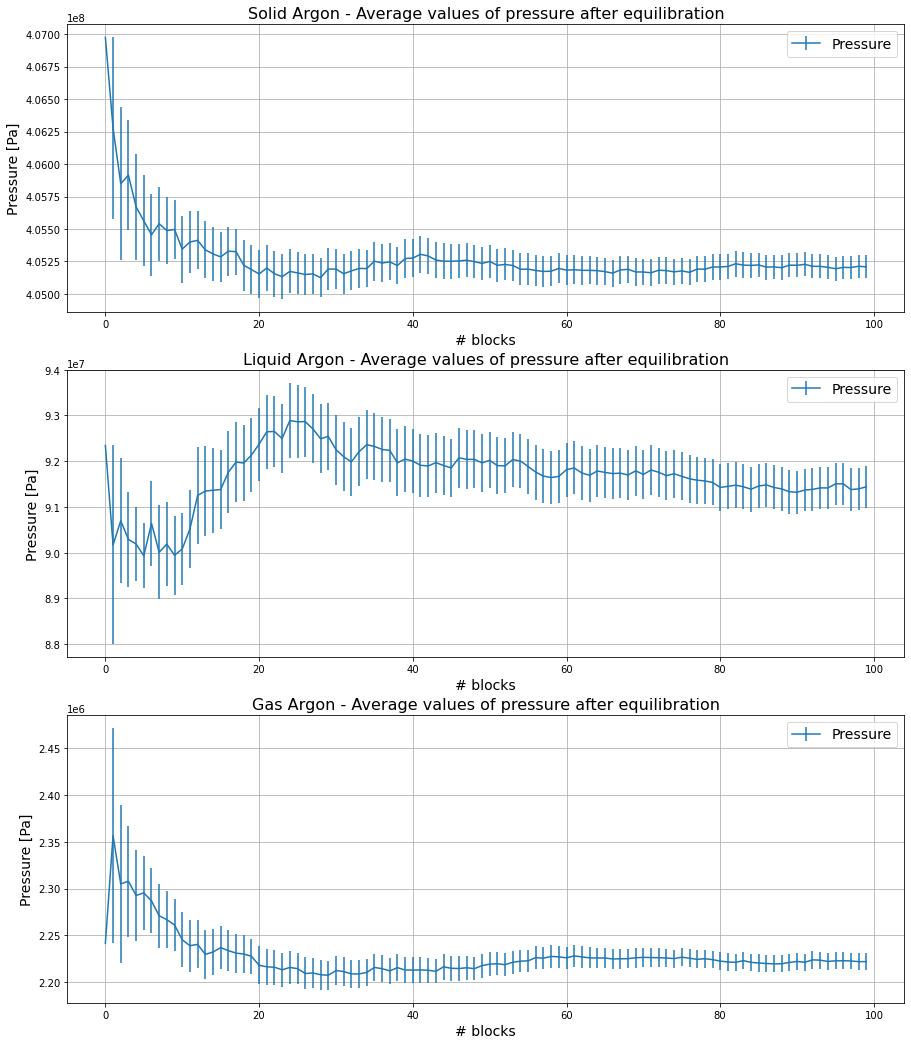

In [15]:
## IN SI UNITS
N=100
x = np.arange(N)
#x *= 200
##reading
press_gas = np.loadtxt( './Gas/press_blocks_forseok3_afterequi.dat',max_rows=N, usecols=2)
err_gas = np.loadtxt( './Gas/press_blocks_forseok3_afterequi.dat',max_rows=N, usecols=3)
press_liquid = np.loadtxt( './Liquid/press_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
err_liquid = np.loadtxt( './Liquid/press_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
press_solid = np.loadtxt( './Solid/press_blocks_forseok2_afterequi.dat',max_rows=N, usecols=2)
err_solid = np.loadtxt( './Solid/press_blocks_forseok2_afterequi.dat',max_rows=N, usecols=3)
press = [press_solid , press_liquid, press_gas]
err = [err_solid, err_liquid, err_gas]

##rescaling
fs = epsilon/(sigma**3)
for i in range(3):
    press[i] *= fs
    err[i] *= fs

##plot
names = ["Solid" , "Liquid", "Gas"]
plt.figure(figsize=(15,18))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.errorbar(x,press[i], err[i], label="Pressure")
    plt.xlabel('# blocks',size=14)
    plt.ylabel('Pressure [Pa]',size=14)
    plt.title(names[i] + " Argon - Average values of pressure after equilibration", size=16)
    plt.legend(loc="upper right" , fontsize=14)
    plt.grid(True)

###### Run this cells to quickly run the simulation:

In [22]:
import os
## solid , liquid , gas
dirnames= ["Solid\n" , "Liquid\n", "Gas\n"]
rho = ["1.1\n", "0.8\n", "0.05\n"]
temp = ["0.8\n", "1.1\n" , "1.2\n"]
r_cut = ["2.2\n", "2.5\n", "5.0\n"]

##Solid:
in_file = open("input_mio.dat", "r")
list_of_lines = in_file.readlines()
list_of_lines[0] = temp[0]
list_of_lines[2] = rho[0]
list_of_lines[3] = r_cut[0]
list_of_lines[11] = dirnames[0]
##first step of the equilibration -> 1000 steps with neither restarting nor rescaling speeds
list_of_lines[5] = "1000\n"
list_of_lines[6] = "9\n" ## 500 steps tot
list_of_lines[10] = "_forseok2_NOequi\n"
list_of_lines[8] = "0\n"
list_of_lines[9] = "0\n"
in_file.close()

out_file = open("input_mio.dat", "w")
out_file.writelines(list_of_lines)
out_file.close()

os.system("./NVE_nuovo.exe")

0

In [30]:
## equilibration-> run the simulation 5 times restarting and rescaling
in_file = open("input_mio.dat", "r")
list_of_lines = in_file.readlines()
list_of_lines[8] = "1\n"
list_of_lines[9] = "1\n"

out_file = open("input_mio.dat", "w")
out_file.writelines(list_of_lines)
out_file.close()

for i in range(5):
    os.system("./NVE_nuovo.exe")
    print("run", i+1 , "-> finished")

run 1 -> finished
run 2 -> finished
run 3 -> finished
run 4 -> finished
run 5 -> finished


In [28]:
for i in range(2):
    os.system("./NVE_nuovo.exe")
    print("run", i+1 , "-> finished")

run 1 -> finished
run 2 -> finished


In [ ]:
## after equilibration:
in_file = open("input_mio.dat", "r")
list_of_lines = in_file.readlines()
list_of_lines[8] = "1\n"
list_of_lines[9] = "1\n"
list_of_lines[5] = "2000\n"
list_of_lines[6] = "100\n"
list_of_lines[10] = "_forseok3_afterequi\n"

out_file = open("input_mio.dat", "w")
out_file.writelines(list_of_lines)
out_file.close()

os.system("./NVE_nuovo.exe")